# SVM (Support vector machine)


In [4]:
#load the library for svm
library(e1071)
library(caret)
library(MASS)
library(tidyverse)

Loading required package: ggplot2

Loading required package: lattice

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
data(Boston)
str(Boston)
set.seed(252)

index = createDataPartition(Boston$medv, p = 0.8, list = FALSE)
train.dat = Boston[index,]
test.dat = Boston[-index,]


'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


[1] 3.904192

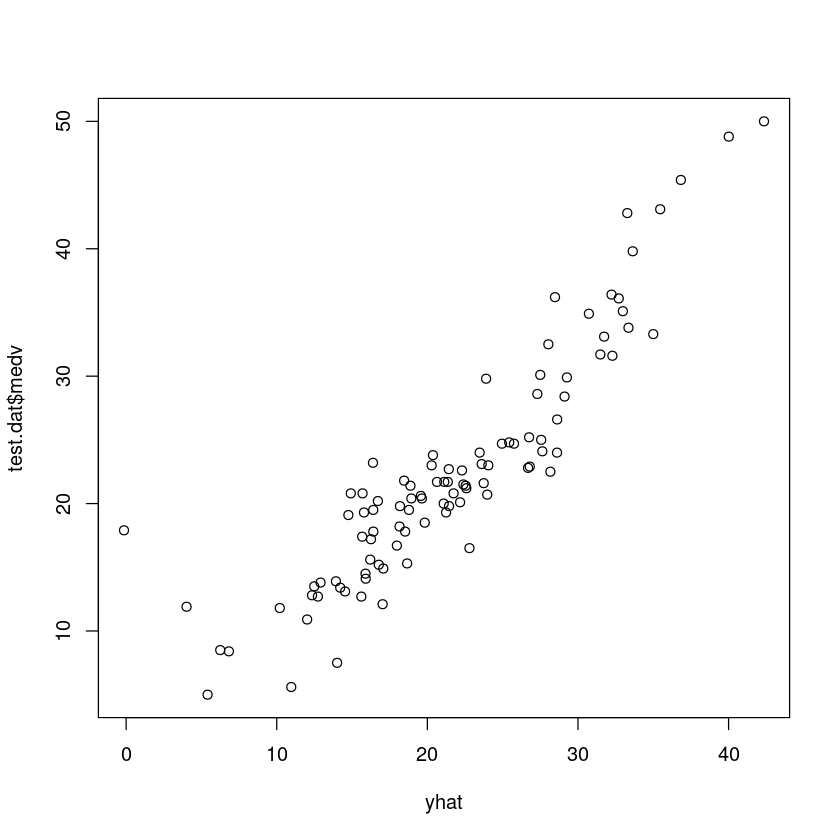

In [10]:
#SVM regression to predict 'medv' using other variables in the dataset , using
svm.fit = svm(medv~., data = train.dat, kernel = "linear", cost = 5, scale = FALSE)
#Make prediction on the testing data
yhat = predict(svm.fit, test.dat)
plot(yhat, test.dat$medv)
#RMSE on the testing data of the fitted model
caret::RMSE(test.dat$medv, yhat)

In [6]:
#use train function in caret package to select a better 'cost'

# model training using the caret package : train function 

set.seed(295)

#cross validation 
cv.control = trainControl(method = "cv", number = 5)

#create a tuning grid
#hyper parameter : C and sigma

hyper_grid = expand.grid(C=c(0.25,.5,1,1.5,2.0),sigma=c(.1,.15,.2))
#train to find the optimal tuning parameters

SVM.fit0= train(medv~., data=train.dat, method = "svmRadial", 
            trControl = cv.control,
            trace = FALSE,
            tuneGrid = hyper_grid
            #PreProc = c("center","scale")
            #maxit = 500
)


#the best tuning parameter 
SVM.fit0$bestTune


,sigma,C
,<dbl>,<dbl>
13,0.1,2


In [7]:
#Use train function in Caret package to select a better 'cost'
# Model training using the caret package : train function
set.seed(295)
#Cross validation
cv.control = trainControl(method = "cv",
 number = 5)
#
# create a tuning grid
# hyper parameter: C and sigma
h_grid <- expand.grid(
 C = c(0.25, .5, 1, 1.5, 2.0),
 sigma = c(0.01, 0.05, 0.1, 0.15, 0.2)
)
#train to find the optimal tuning parameters
SVM.fit0 = train(medv ~ ., data = train.dat, method = "svmRadial",
 trControl = cv.control,
 trace = FALSE,
 tuneGrid = h_grid
 # preProc = c("center", "scale"),
 # maxit = 500
 )
#The best tuning paramter
SVM.fit0$bestTune

,sigma,C
,<dbl>,<dbl>
23,0.1,2


[1] 2.673122

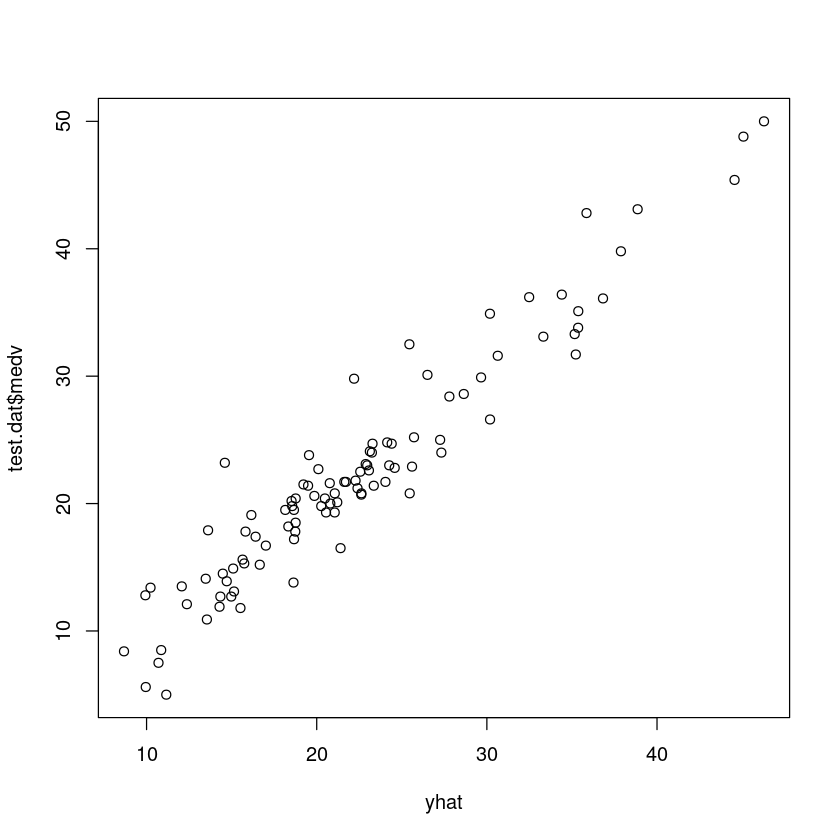

In [8]:
#Make prediction on the testing data
yhat = predict(SVM.fit0, test.dat)
plot(yhat, test.dat$medv)
#RMSE on the testing data of the fitted model
caret::RMSE(test.dat$medv, yhat)